<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_2_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,33.854746,60.769591,0.002143,104.626480,104.624374,0.002106
1,0.0,1.0,31.099208,82.696853,0.000936,123.796998,123.795256,0.001743
2,0.0,2.0,84.836367,75.958416,0.000239,170.795022,170.796336,-0.001313
3,0.0,3.0,46.297653,70.996198,-0.001429,127.292422,127.294040,-0.001618
4,0.0,4.0,26.514506,44.437063,-0.020969,80.930600,80.951862,-0.021261
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,65.847512,77.661382,-0.007982,153.500912,153.508054,-0.007142
119996,999.0,116.0,77.316076,63.845332,-0.002646,151.158761,151.160705,-0.001944
119997,999.0,117.0,35.032301,79.956943,-0.002675,124.986569,124.992098,-0.005529
119998,999.0,118.0,21.776429,36.722356,0.010583,68.509368,68.508389,0.000979


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    33.854746  60.769591  0.002143  104.626480  104.624374  0.002106
      1.0    31.099208  82.696853  0.000936  123.796998  123.795256  0.001743
      2.0    84.836367  75.958416  0.000239  170.795022  170.796336 -0.001313
      3.0    46.297653  70.996198 -0.001429  127.292422  127.294040 -0.001618
      4.0    26.514506  44.437063 -0.020969   80.930600   80.951862 -0.021261
...                ...        ...       ...         ...         ...       ...
999.0 115.0  65.847512  77.661382 -0.007982  153.500912  153.508054 -0.007142
      116.0  77.316076  63.845332 -0.002646  151.158761  151.160705 -0.001944
      117.0  35.032301  79.956943 -0.002675  124.986569  124.992098 -0.005529
      118.0  21.776429  36.722356  0.010583   68.509368   68.508389  0.000979
      119.0  23.956522  62.427394 -0.004927   96.378989   96.390240 -0.011251

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    33.854746  60.769591  0.002143  104.626480  104.624374  0.002106
      1.0    31.099208  82.696853  0.000936  123.796998  123.795256  0.001743
      2.0    84.836367  75.958416  0.000239  170.795022  170.796336 -0.001313
      3.0    46.297653  70.996198 -0.001429  127.292422  127.294040 -0.001618
      4.0    26.514506  44.437063 -0.020969   80.930600   80.951862 -0.021261
...                ...        ...       ...         ...         ...       ...
999.0 115.0  65.847512  77.661382 -0.007982  153.500912  153.508054 -0.007142
      116.0  77.316076  63.845332 -0.002646  151.158761  151.160705 -0.001944
      117.0  35.032301  79.956943 -0.002675  124.986569  124.992098 -0.005529
      118.0  21.776429  36.722356  0.010583   68.509368   68.508389  0.000979
      119.0  23.956522  62.427394 -0.004927   96.378989   96.390240 -0.011251

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,33.854746,60.769591,0.002143,104.626480,104.624374,0.002106
1,0.0,1.0,31.099208,82.696853,0.000936,123.796998,123.795256,0.001743
2,0.0,2.0,84.836367,75.958416,0.000239,170.795022,170.796336,-0.001313
3,0.0,3.0,46.297653,70.996198,-0.001429,127.292422,127.294040,-0.001618
4,0.0,4.0,26.514506,44.437063,-0.020969,80.930600,80.951862,-0.021261
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,65.847512,77.661382,-0.007982,153.500912,153.508054,-0.007142
119996,999.0,116.0,77.316076,63.845332,-0.002646,151.158761,151.160705,-0.001944
119997,999.0,117.0,35.032301,79.956943,-0.002675,124.986569,124.992098,-0.005529
119998,999.0,118.0,21.776429,36.722356,0.010583,68.509368,68.508389,0.000979


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    33.854746  60.769591  0.002143  104.626480  104.624374  0.002106
      1.0    31.099208  82.696853  0.000936  123.796998  123.795256  0.001743
      2.0    84.836367  75.958416  0.000239  170.795022  170.796336 -0.001313
      3.0    46.297653  70.996198 -0.001429  127.292422  127.294040 -0.001618
      4.0    26.514506  44.437063 -0.020969   80.930600   80.951862 -0.021261
...                ...        ...       ...         ...         ...       ...
999.0 115.0  65.847512  77.661382 -0.007982  153.500912  153.508054 -0.007142
      116.0  77.316076  63.845332 -0.002646  151.158761  151.160705 -0.001944
      117.0  35.032301  79.956943 -0.002675  124.986569  124.992098 -0.005529
      118.0  21.776429  36.722356  0.010583   68.509368   68.508389  0.000979
      119.0  23.956522  62.427394 -0.004927   96.378989   96.390240 -0.011251

[120000 rows x 6 columns]

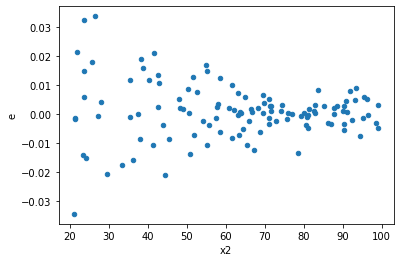

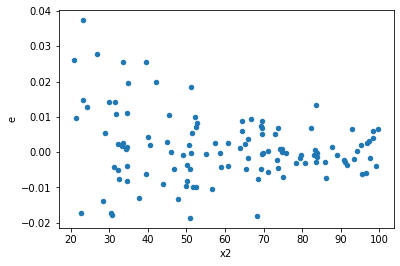

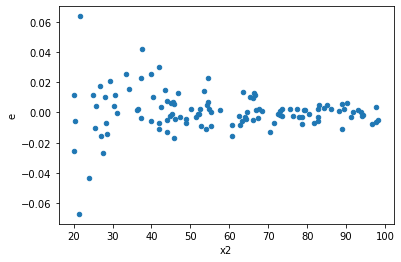

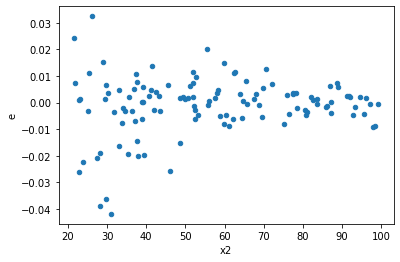

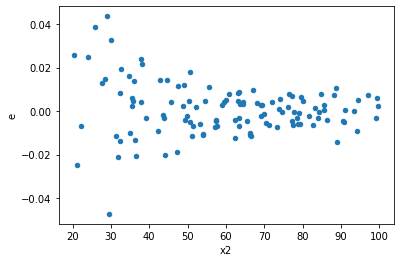

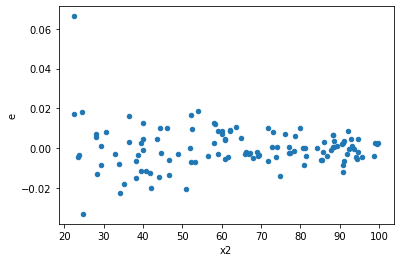

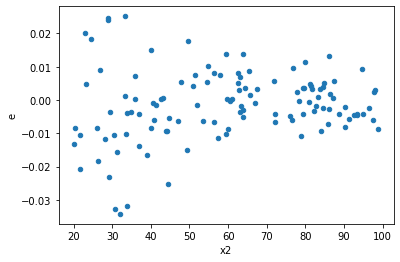

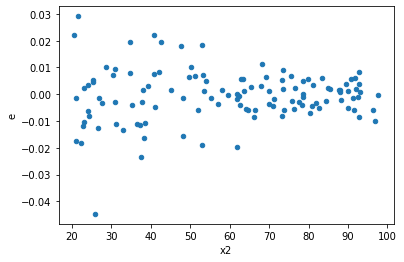

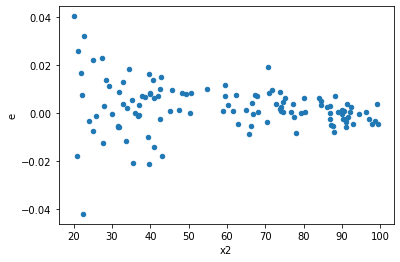

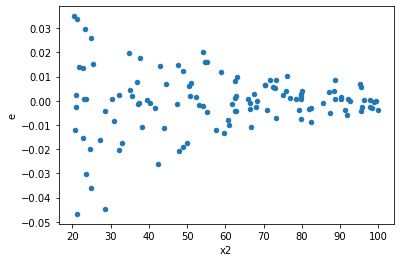

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,58.0,58.0,0.0043846865901003874,0.0061802919542161576,7.559804465690323e-05,0.00010655675783131306,1.409517379912588,0.19419596145107532,0.9029020192744623,0.09709798072553766,Reject001=1 : Homoscedasticity
2.0,63.0,53.0,0.006350829482208876,0.016269407982678615,0.00010080681717791866,0.00030696996193733234,3.0451309795402697,5.398222587449375e-05,0.9999730088870628,2.6991112937246875e-05,Reject001=0 : Heteroscedasticity
4.0,47.0,69.0,0.005741275386867133,0.010372402836751327,0.00012215479546525814,0.0001503246787934975,1.2306080839556652,0.42731218466184795,0.786343907669076,0.21365609233092397,Reject001=1 : Homoscedasticity
5.0,63.0,53.0,0.0019432489729134174,0.011255312538425391,3.084522179227647e-05,0.00021236438751746022,6.884839050521449,2.7367219601615034e-11,0.9999999999863164,1.3683609800807517e-11,Reject001=0 : Heteroscedasticity
6.0,58.0,58.0,0.006011185504001637,0.006572512918025826,0.00010364112937933856,0.0001133191882418246,1.0933804843737587,0.7350404829264812,0.6324797585367594,0.3675202414632406,Reject001=1 : Homoscedasticity
11.0,55.0,61.0,0.004247526699887016,0.008942226271677282,7.722775817976392e-05,0.00014659387330618495,1.8982018481613403,0.015343775615465516,0.9923281121922672,0.007671887807732758,Reject001=1 : Homoscedasticity
12.0,57.0,59.0,0.005099899221471006,0.007640686073763591,8.9471916166158e-05,0.00012950315379260324,1.4474167911202813,0.1612564883720129,0.9193717558139936,0.08062824418600645,Reject001=1 : Homoscedasticity
15.0,61.0,55.0,0.0011781646138703677,0.019859618476631907,1.931417399787488e-05,0.0003610839723023983,18.69528421676889,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
18.0,48.0,68.0,0.0018048726122160354,0.0054586823023187025,3.760151275450074e-05,8.027473973998092e-05,2.1348805901531818,0.00402578689987676,0.9979871065500616,0.00201289344993838,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,58.0,58.0,0.0043846865901003874,0.0061802919542161576,7.559804465690323e-05,0.00010655675783131306,1.409517379912588,0.19419596145107532,Reject001=1 : Homoscedasticity
1.0,56.0,60.0,0.0077754656541414785,0.0018647739270109352,0.00013884760096681212,3.1079565450182254e-05,0.22383941266375218,6.928272525680872e-08,Reject001=0 : Heteroscedasticity
2.0,63.0,53.0,0.006350829482208876,0.016269407982678615,0.00010080681717791866,0.00030696996193733234,3.0451309795402697,5.398222587449375e-05,Reject001=0 : Heteroscedasticity
3.0,57.0,59.0,0.007393293135385642,0.006253336985647854,0.0001297068971120288,0.00010598876246860769,0.817140528595518,0.44548842469194205,Reject001=1 : Homoscedasticity
4.0,47.0,69.0,0.005741275386867133,0.010372402836751327,0.00012215479546525814,0.0001503246787934975,1.2306080839556652,0.42731218466184795,Reject001=1 : Homoscedasticity
5.0,63.0,53.0,0.0019432489729134174,0.011255312538425391,3.084522179227647e-05,0.00021236438751746022,6.884839050521449,2.7367219601615034e-11,Reject001=0 : Heteroscedasticity
6.0,58.0,58.0,0.006011185504001637,0.006572512918025826,0.00010364112937933856,0.0001133191882418246,1.0933804843737587,0.7350404829264812,Reject001=1 : Homoscedasticity
7.0,52.0,64.0,0.008919832188438488,0.0018544959953917094,0.00017153523439304783,2.897649992799546e-05,0.1689244779973312,7.132351335695815e-10,Reject001=0 : Heteroscedasticity
8.0,56.0,60.0,0.010530123094854222,0.0013257739364615371,0.00018803791240811112,2.2096232274358953e-05,0.11750945323410121,1.1885405557627107e-13,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    659
Reject001=1 : Homoscedasticity      341
Name: Result_test, dtype: int64